In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.signal import medfilt

import sklearn.cluster
from sklearn.model_selection import train_test_split
import umap

    
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

path = "/media/DOCUMENTOS/Backups/Data"

In [2]:
date="expo_SV0_march_14_2/"
label="_2"
path_coadds= path+ "/desi_data/"+date

In [3]:
print(path_coadds+str(path_coadds.split("/")[-2])+".csv")
df = pd.read_pickle(path_coadds+str(path_coadds.split("/")[-2])+".csv")
df.head()

/media/DOCUMENTOS/Backups/Data/desi_data/expo_SV0_march_14_2/expo_SV0_march_14_2.csv


TARGETID                                         WAVELENGTH  \
0  35186148770843363  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
1  35186148770843761  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
2  35186148770844616  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
3  35186148775036873  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
4  35186148775037106  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   

                                                FLUX  \
0  [16.629738, -7.133062, 4.2576985, 25.119408, 9...   
1  [0.032739643, 10.340323, 0.28587627, 16.81467,...   
2  [9.3599, -0.30654413, 20.865473, 3.4739144, 21...   
3  [0.5740119, 2.6363888, -8.660715, -6.4718666, ...   
4  [-0.729177, 6.761434, 12.152129, 18.775274, 31...   

                                             ERRFLUX          CHI2         Z  \
0  [0.017274935, 0.010060674, 0.010030603, 0.0073...  12707.085760 -0.000116   
1  [0.02114713, 0.010559111, 0.010497417, 0.00900...  10390.526888  0.000073   
2  [0.018445576, 0.009608054, 0.009228553, 0.0082...   9012.405702  0.000272   
3  [0.019074239, 0.008593588, 0.011730482, 0.0095...   9322.706255 -0.000187   
4  [0.01886503, 0.0092472015, 0.010697438, 0.0077...  10271.535701 -0.000076   

       ZERR  ZWARN  NPIXELS SPECTYPE SUBTYPE  NCOEFF     DELTACHI2  NUMEXP  \
0  0.000004      0     7928     STAR       M       5  10090.780903       0   
1  0.000007      0     7929     STAR       M       5   5975.451571       0   
2  0.000026      0     7930     STAR       K       5    167.001616       0   
3  0.000017      0     7924     STAR       K       5     42.947868       0   
4  0.000008      0     7926     STAR       K       5   1487.379914       0   

   NUMTILE   TILE      NIGHT PETAL  
0        1  65008  20200314.     0  
1        1  65008  20200314.     0  
2        1  65008  20200314.     0  
3        1  65008  20200314.     0  
4        1  65008  20200314.     0

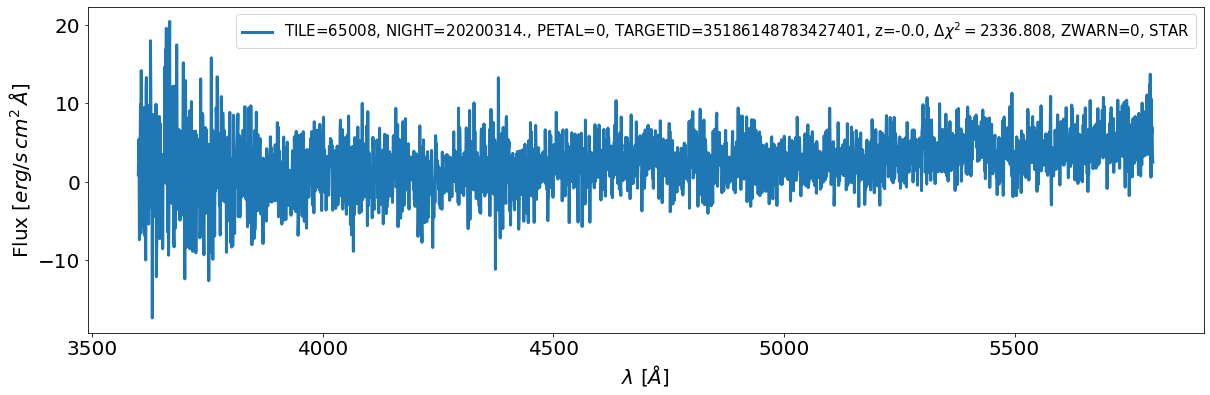

In [4]:
plt.figure(figsize=(20,6))
ii = 20
plt.plot(np.array(df['WAVELENGTH'][ii]),df['FLUX'][ii],
         label="TILE="+str(df['TILE'][ii])+", "+"NIGHT="+str(df['NIGHT'][ii])
         +", "+"PETAL="+str(df['PETAL'][ii])+", "+"TARGETID="+str(int(df['TARGETID'][ii]))
         +", "+"z="+str(round(df['Z'][ii],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][ii],3))
         +", "+"ZWARN="+str(df['ZWARN'][ii])+", "+str(df['SPECTYPE'][ii]))
#plt.plot(df['WAVELENGTH'][ii],medfilt(df['FLUX'][ii], 101),label="SMOOTHED spectrum",alpha=0.7,color='k')
#plt.fill_between(df['WAVELENGTH'][ii],medfilt(df['FLUX'][ii], 101),np.min(df['FLUX'][ii]),alpha=0.4,color='orange')
plt.legend(fontsize=15)
plt.xlabel("$\lambda$ $[\AA]$")
plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")
plt.show()

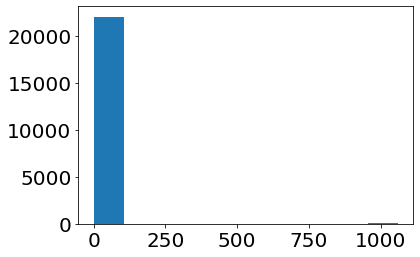

In [5]:
_ = plt.hist(df['ZWARN']) #Distribtuion of label ZWARN

In [6]:
np.unique(df['ZWARN'])

array([   0,    4,   32,   36, 1024, 1028, 1056, 1060])

In [7]:
df = df.reset_index(drop=True)
df

TARGETID                                         WAVELENGTH  \
0       35186148770843363  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
1       35186148770843761  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
2       35186148770844616  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
3       35186148775036873  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
4       35186148775037106  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
...                   ...                                                ...   
22100  611652019035308252  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22101  611652019035308990  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22102  611652022675964123  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22103  611652022675964343  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22104  611652022675964670  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   

                                                    FLUX  \
0      [16.629738, -7.133062, 4.2576985, 25.119408, 9...   
1      [0.032739643, 10.340323, 0.28587627, 16.81467,...   
2      [9.3599, -0.30654413, 20.865473, 3.4739144, 21...   
3      [0.5740119, 2.6363888, -8.660715, -6.4718666, ...   
4      [-0.729177, 6.761434, 12.152129, 18.775274, 31...   
...                                                  ...   
22100  [0.5972299, 17.676579, 10.872576, 0.93220675, ...   
22101  [4.4486704, -6.756239, -6.7208223, -7.9544024,...   
22102  [9.209778, 3.8351939, -3.8647337, 3.0884986, -...   
22103  [2.428212, -0.7727672, -0.617631, 2.0263023, -...   
22104  [8.260263, -6.7957487, 3.433288, -4.431857, -2...   

                                                 ERRFLUX          CHI2  \
0      [0.017274935, 0.010060674, 0.010030603, 0.0073...  12707.085760   
1      [0.02114713, 0.010559111, 0.010497417, 0.00900...  10390.526888   
2      [0.018445576, 0.009608054, 0.009228553, 0.0082...   9012.405702   
3      [0.019074239, 0.008593588, 0.011730482, 0.0095...   9322.706255   
4      [0.01886503, 0.0092472015, 0.010697438, 0.0077...  10271.535701   
...                                                  ...           ...   
22100  [0.00909646, 0.009056626, 0.012580914, 0.01638...   9479.129530   
22101  [0.012542188, 0.012960598, 0.016695278, 0.0209...   9059.794404   
22102  [0.012941558, 0.014030245, 0.017447231, 0.0226...   9233.822045   
22103  [0.009500552, 0.0090708155, 0.011421528, 0.015...   9129.063329   
22104  [0.013174635, 0.013536587, 0.017266715, 0.0237...   9092.427711   

              Z      ZERR  ZWARN  NPIXELS SPECTYPE SUBTYPE  NCOEFF  \
0     -0.000116  0.000004      0     7928     STAR       M       5   
1      0.000073  0.000007      0     7929     STAR       M       5   
2      0.000272  0.000026      0     7930     STAR       K       5   
3     -0.000187  0.000017      0     7924     STAR       K       5   
4     -0.000076  0.000008      0     7926     STAR       K       5   
...         ...       ...    ...      ...      ...     ...     ...   
22100  0.689862  0.000087      4     7926   GALAXY              10   
22101  0.289601  0.000105      4     7904   GALAXY              10   
22102  0.802210  0.000133      4     7902   GALAXY              10   
22103  0.802328  0.000058      4     7925   GALAXY              10   
22104  0.276225  0.000059      4     7883   GALAXY              10   

          DELTACHI2  NUMEXP  NUMTILE   TILE      NIGHT PETAL  
0      10090.780903       0        1  65008  20200314.     0  
1       5975.451571       0        1  65008  20200314.     0  
2        167.001616       0        1  65008  20200314.     0  
3         42.947868       0        1  65008  20200314.     0  
4       1487.379914       0        1  65008  20200314.     0  
...             ...     ...      ...    ...        ...   ...  
22100      2.981981       0        1  68000  20200314.     9  
22101      0.768590       0        1  68000  20200314.     9  
22102      4.439055       0        1  

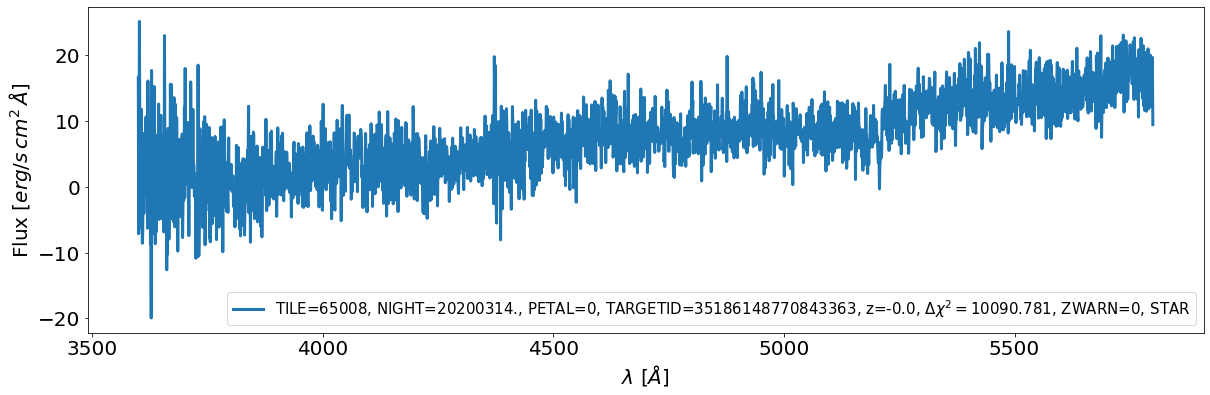

In [8]:
plt.figure(figsize=(20,6))
ii = 0
plt.plot(np.array(df['WAVELENGTH'][ii]),df['FLUX'][ii],
         label="TILE="+str(df['TILE'][ii])+", "+"NIGHT="+str(df['NIGHT'][ii])
         +", "+"PETAL="+str(df['PETAL'][ii])+", "+"TARGETID="+str(int(df['TARGETID'][ii]))
         +", "+"z="+str(round(df['Z'][ii],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][ii],3))
         +", "+"ZWARN="+str(df['ZWARN'][ii])+", "+str(df['SPECTYPE'][ii]))
#plt.plot(df['WAVELENGTH'][ii],medfilt(df['FLUX'][ii], 101),
#         label="SMOOTHED spectrum",alpha=0.7,color='k')
#plt.fill_between(df['WAVELENGTH'][ii],medfilt(df['FLUX'][ii], 101),np.min(df['FLUX'][ii]),alpha=0.4,color='orange')
plt.legend(fontsize=15)
plt.xlabel("$\lambda$ $[\AA]$")
plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")
plt.show()

In [9]:
columns_D = ['FLUX','TARGETID']
X = df[columns_D]
Y = np.array(df['SPECTYPE'])

In [10]:
classes = np.unique(Y)
print(classes)
for i, c in enumerate(classes):
    Y[Y == c] = i  # GALAXY=0  -   QSO=1    -  STAR=2
print(Y)

['GALAXY' 'QSO' 'STAR']
[2 2 2 ... 0 0 0]


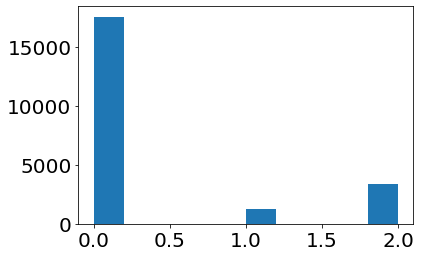

In [11]:
_ = plt.hist(Y,) #Distribution for the 100% 0: Galaxy, 1: QSO, 2: Star

### Defining X

In [12]:
'''
X1, X2, Y1, Y2 = train_test_split(X, Y, test_size=0.5, random_state=42)
TID1 = np.array(X1['TARGETID']).tolist()
TID2 = np.array(X2['TARGETID']).tolist()
X1 = np.array(X1['FLUX']).tolist()
X2 = np.array(X2['FLUX']).tolist()
Y1 = np.array(Y1.tolist())
Y2 = np.array(Y2.tolist())
'''

TID1 = np.array(X['TARGETID']).tolist()
X1 = np.array(X['FLUX']).tolist()
Y1 = np.array(Y.tolist())


colors = np.zeros(len(Y1)).astype(str)
colors[Y1==0] = "#75bbfd"
colors[Y1==1] = "#c20078"
colors[Y1==2] = "#96f97b"

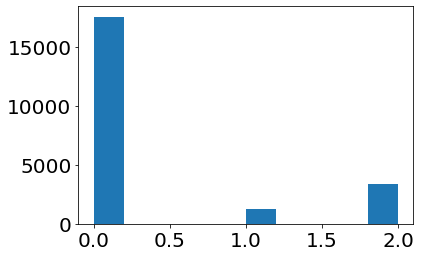

In [13]:
_ = plt.hist(Y1,) #Distribution for the 50% 0: Galaxy, 1: QSO, 2: Star

###  Umap Metaparameters

In [14]:
neigh = np.arange(5,50,10)
print(neigh)
min_dist = np.linspace(0.0,0.9,4)
print(min_dist)
metric = np.array(['euclidean','minkowski','cosine'])
print(metric)

[ 5 15 25 35 45]
[0.  0.3 0.6 0.9]
['euclidean' 'minkowski' 'cosine']


In [15]:
if False:
    for me in metric:
        for mi in min_dist:
            for n in neigh:
                fig = plt.figure(figsize=(20,4.8))
                reducer = umap.UMAP(n_neighbors=n,min_dist=mi,metric=me)
                reducer.fit(X1)
                embedding = reducer.transform(X1)
                xmin = min(embedding[:,0])-1
                xmax = max(embedding[:,0])+1
                ymin = min(embedding[:,1])-1
                ymax = max(embedding[:,1])+1            

                plt.subplot(141)
                plt.title("Umap",size=20)
                plt.scatter(embedding[:,0], embedding[:,1], c=colors, cmap='Paired', s=1.0)
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax)
                plt.grid(alpha=0.5)

                plt.subplot(142)
                plt.title("Galaxy",size=20)
                plt.scatter(embedding[:,0][Y1==0], embedding[:,1][Y1==0], color="#75bbfd", cmap='Paired', s=1.0)
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax)  
                plt.grid(alpha=0.5)

                plt.subplot(143)
                plt.title("QSO",size=20)
                plt.scatter(embedding[:,0][Y1==1], embedding[:,1][Y1==1], color="#c20078", cmap='Paired', s=1.0)
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax) 
                plt.grid(alpha=0.5)

                plt.subplot(144)
                plt.title("Star",size=20)
                plt.scatter(embedding[:,0][Y1==2], embedding[:,1][Y1==2], color="#96f97b" , cmap='Paired', s=1.0)
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax)
                plt.grid(alpha=0.5)


                fig.suptitle("Neighbors="+str(n)+ " min_dist="+str(round(mi,2))+" metric="+str(me),size=25, y=1.1)
                plt.tight_layout()
                plt.savefig("../Figures/nn{}_md{}_{}".format(n,mi,me)+str(label)+".png",renderized=True, transparent=True)
                plt.savefig("../Figures/nn{}_md{}_{}".format(n,mi,me)+str(label)+".pdf",renderized=True, transparent=True)
                plt.show()

### Experiment 1
nn=15     min_dist=0.5    metric cosine

In [16]:
if False:
    n=5
    fig = plt.figure(figsize=(25,6*n))
    for i in range(n):
        reducer = umap.UMAP(n_neighbors=15,min_dist=0.5,metric='cosine')
        reducer.fit(X1)
        embedding1 = reducer.transform(X1)
        xmin = min(embedding1[:,0])-1
        xmax = max(embedding1[:,0])+1
        ymin = min(embedding1[:,1])-1
        ymax = max(embedding1[:,1])+1            

        plt.subplot(5,4,4*i+1)
        plt.title("Umap",size=20)
        plt.scatter(embedding1[:,0], embedding1[:,1], c=colors, cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)

        plt.subplot(5,4,4*i+2)
        plt.title("Galaxy",size=20)
        plt.scatter(embedding1[:,0][Y1==0], embedding1[:,1][Y1==0], color="#75bbfd", cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)            

        plt.subplot(5,4,4*i+3)
        plt.title("QSO",size=20)
        plt.scatter(embedding1[:,0][Y1==1], embedding1[:,1][Y1==1], color="#c20078", cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)            

        plt.subplot(5,4,4*i+4)
        plt.title("Star",size=20)
        plt.scatter(embedding1[:,0][Y1==2], embedding1[:,1][Y1==2], color="#96f97b", cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)            

    fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=0.92)
   # plt.savefig("../Figures/experiment1_multiple"+str(label)+".png",renderized=True, transparent=True)
   # plt.savefig("../Figures/experiment1_multiple"+str(label)+".pdf",renderized=True, transparent=True)
    plt.show()

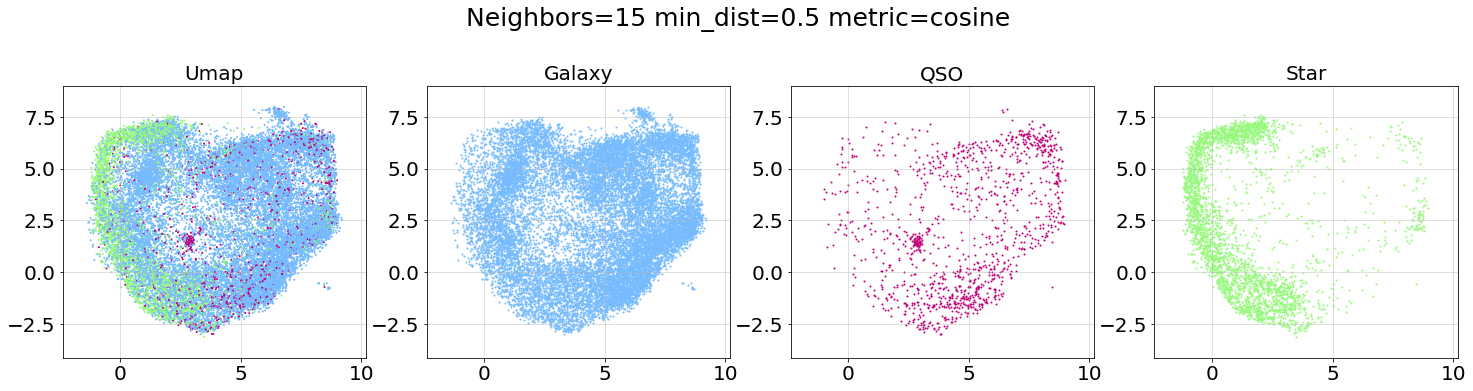

In [17]:
n = 1
fig = plt.figure(figsize=(25,5*n))
for i in range(n):
    reducer = umap.UMAP(n_neighbors=15,min_dist=0.5,metric='cosine')
    reducer.fit(X1)
    embedding1 = reducer.transform(X1)
    xmin = min(embedding1[:,0])-1
    xmax = max(embedding1[:,0])+1
    ymin = min(embedding1[:,1])-1
    ymax = max(embedding1[:,1])+1            

    plt.subplot(n,4,4*i+1)
    plt.title("Umap",size=20)
    plt.scatter(embedding1[:,0], embedding1[:,1], c=colors, cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

    plt.subplot(n,4,4*i+2)
    plt.title("Galaxy",size=20)
    plt.scatter(embedding1[:,0][Y1==0], embedding1[:,1][Y1==0], color="#75bbfd", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

    plt.subplot(n,4,4*i+3)
    plt.title("QSO",size=20)
    plt.scatter(embedding1[:,0][Y1==1], embedding1[:,1][Y1==1], color="#c20078", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

    plt.subplot(n,4,4*i+4)
    plt.title("Star",size=20)
    plt.scatter(embedding1[:,0][Y1==2], embedding1[:,1][Y1==2], color="#96f97b", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.1)
#plt.savefig("../Figures/experiment1"+str(label)+".png",renderized=True, transparent=True)
#plt.savefig("../Figures/experiment1"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

In [ ]:
dft = pd.DataFrame(np.array([embedding1[:,0],embedding1[:,1],Y1,TID1]).T,columns=['X','Y','CLASS','TID'])
dft.to_csv("experiment1"+str(label)+".csv")
dft.head()

In [ ]:
jj = (embedding1[:,0]>10)
n = 6
ii = [np.random.choice(np.array(TID1)[jj]) for _ in range(n)]
kk = np.zeros(n,dtype=int)

for k,i in enumerate(ii):
    kk[k] = np.where(df['TARGETID']==i)[0][0]

fig = plt.figure(figsize=(20,5*n))
for k,i in enumerate(kk):
    plt.subplot(n,1,k+1)
    plt.plot(df['WAVELENGTH'][i],df['FLUX'][i],
             label="TILE="+str(df['TILE'][i])+", "+"NIGHT="+str(df['NIGHT'][i])
             +", "+"PETAL="+str(df['PETAL'][i])+", "+"TARGETID="+str(int(df['TARGETID'][i]))
             +", "+"z="+str(round(df['Z'][i],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][i],3))
             +", "+"ZWARN="+str(df['ZWARN'][i])+", "+str(df['SPECTYPE'][i]))
    #plt.plot(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),
    #         label="SMOOTHED spectrum",alpha=0.7,color='k')
    #plt.fill_between(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),np.min(df['FLUX'][i]),alpha=0.4,color='orange')
    plt.legend(fontsize=17)
    plt.xlabel("$\lambda$ $[\AA]$")
    plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.01)
plt.tight_layout()
plt.savefig("../Figures/experiment1_i1"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment1_i1"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

In [ ]:
jj = (embedding1[:,1]>7)
n = 6
ii = [np.random.choice(np.array(TID1)[jj]) for _ in range(n)]
kk = np.zeros(n,dtype=int)

for k,i in enumerate(ii):
    kk[k] = np.where(df['TARGETID']==i)[0][0]

fig = plt.figure(figsize=(20,5*n))
for k,i in enumerate(kk):
    plt.subplot(n,1,k+1)
    plt.plot(df['WAVELENGTH'][i],df['FLUX'][i],
             label="TILE="+str(df['TILE'][i])+", "+"NIGHT="+str(df['NIGHT'][i])
             +", "+"PETAL="+str(df['PETAL'][i])+", "+"TARGETID="+str(int(df['TARGETID'][i]))
             +", "+"z="+str(round(df['Z'][i],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][i],3))
             +", "+"ZWARN="+str(df['ZWARN'][i])+", "+str(df['SPECTYPE'][i]),alpha=0.7)
    #plt.plot(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),
    #         label="SMOOTHED spectrum",alpha=0.7,color='k')
    #plt.fill_between(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),np.min(df['FLUX'][i]),alpha=0.4,color='orange')
    plt.legend(fontsize=17)
    plt.xlabel("$\lambda$ $[\AA]$")
    plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")
    
fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.01)
plt.tight_layout()
plt.savefig("../Figures/experiment1_i2"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment1_i2"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

In [ ]:
jj = (embedding1[:,0]<0) & (embedding1[:,1]<-5) & (embedding1[:,0]>-5)
n = 6
ii = [np.random.choice(np.array(TID1)[jj]) for _ in range(n)]
kk = np.zeros(n,dtype=int)

for k,i in enumerate(ii):
    kk[k] = np.where(df['TARGETID']==i)[0][0]

fig = plt.figure(figsize=(20,5*n))
for k,i in enumerate(kk):
    plt.subplot(n,1,k+1)
    plt.plot(df['WAVELENGTH'][i],df['FLUX'][i],
             label="TILE="+str(df['TILE'][i])+", "+"NIGHT="+str(df['NIGHT'][i])
             +", "+"PETAL="+str(df['PETAL'][i])+", "+"TARGETID="+str(int(df['TARGETID'][i]))
             +", "+"z="+str(round(df['Z'][i],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][i],3))
             +", "+"ZWARN="+str(df['ZWARN'][i])+", "+str(df['SPECTYPE'][i]),alpha=0.7)
    #plt.plot(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),
    #         label="SMOOTHED spectrum",alpha=0.7,color='k')
    #plt.fill_between(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),np.min(df['FLUX'][i]),alpha=0.4,color='orange')
    plt.legend(fontsize=17)
    plt.xlabel("$\lambda$ $[\AA]$")
    plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.01)
plt.tight_layout()
plt.savefig("../Figures/experiment1_i3"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment1_i3"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

In [ ]:
jj = (embedding1[:,0]>5) & (embedding1[:,0]<6)
n = 6
ii = [np.random.choice(np.array(TID1)[jj]) for _ in range(n)]
kk = np.zeros(n,dtype=int)

for k,i in enumerate(ii):
    kk[k] = np.where(df['TARGETID']==i)[0][0]

fig = plt.figure(figsize=(20,5*n))
for k,i in enumerate(kk):
    plt.subplot(n,1,k+1)
    plt.plot(df['WAVELENGTH'][i],df['FLUX'][i],
             label="TILE="+str(df['TILE'][i])+", "+"NIGHT="+str(df['NIGHT'][i])
             +", "+"PETAL="+str(df['PETAL'][i])+", "+"TARGETID="+str(int(df['TARGETID'][i]))
             +", "+"z="+str(round(df['Z'][i],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][i],3))
             +", "+"ZWARN="+str(df['ZWARN'][i])+", "+str(df['SPECTYPE'][i]),alpha=0.7)
    #plt.plot(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),
    #         label="SMOOTHED spectrum",alpha=0.7,color='k')
    #plt.fill_between(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),np.min(df['FLUX'][i]),alpha=0.4,color='orange')
    plt.legend(fontsize=17)
    plt.xlabel("$\lambda$ $[\AA]$")
    plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.01)
plt.tight_layout()
plt.savefig("../Figures/experiment1_i4"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment1_i4"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

### Experiment 2
nn=15     min_dist=0.6    metric euclidean

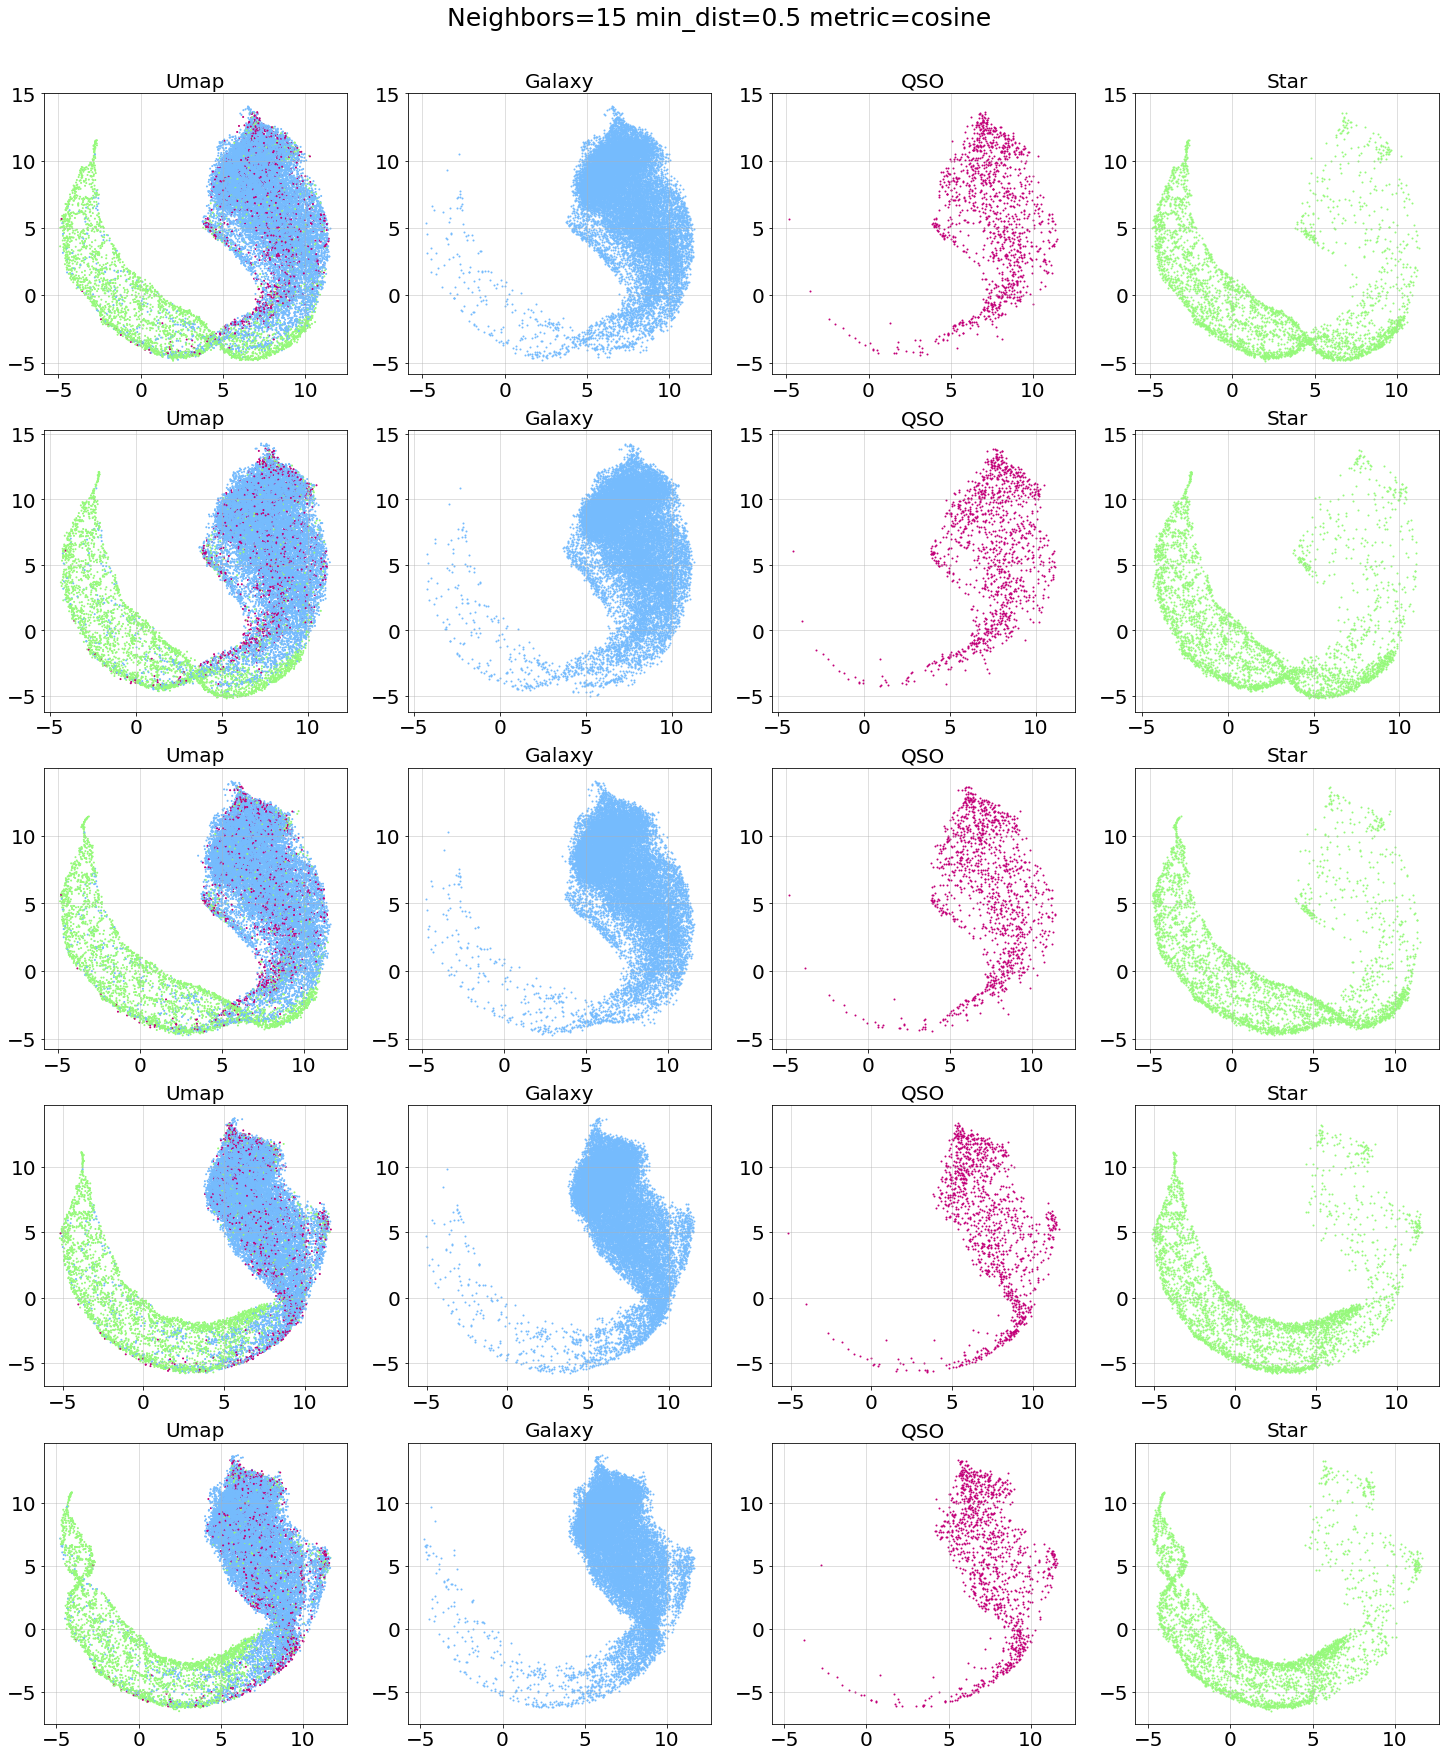

In [20]:
if False:
    n = 5
    fig = plt.figure(figsize=(25,6*n))
    for i in range(n):
        reducer = umap.UMAP(n_neighbors=15,min_dist=0.6,metric='euclidean')
        reducer.fit(X1)
        embedding2 = reducer.transform(X1)
        xmin = min(embedding2[:,0])-1
        xmax = max(embedding2[:,0])+1
        ymin = min(embedding2[:,1])-1
        ymax = max(embedding2[:,1])+1            

        plt.subplot(n,4,4*i+1)
        plt.title("Umap",size=20)
        plt.scatter(embedding2[:,0], embedding2[:,1], c=colors, cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)

        plt.subplot(n,4,4*i+2)
        plt.title("Galaxy",size=20)
        plt.scatter(embedding2[:,0][Y1==0], embedding2[:,1][Y1==0], color="#75bbfd", cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)            

        plt.subplot(n,4,4*i+3)
        plt.title("QSO",size=20)
        plt.scatter(embedding2[:,0][Y1==1], embedding2[:,1][Y1==1], color="#c20078", cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)            

        plt.subplot(n,4,4*i+4)
        plt.title("Star",size=20)
        plt.scatter(embedding2[:,0][Y1==2], embedding2[:,1][Y1==2], color="#96f97b", cmap='Paired', s=1.0)
        plt.grid(alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)            

    fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=0.92)
    plt.savefig("../Figures/experiment2_multiple"+str(label)+".png",renderized=True, transparent=True)
    plt.savefig("../Figures/experiment2_multiple"+str(label)+".pdf",renderized=True, transparent=True)
    plt.show()

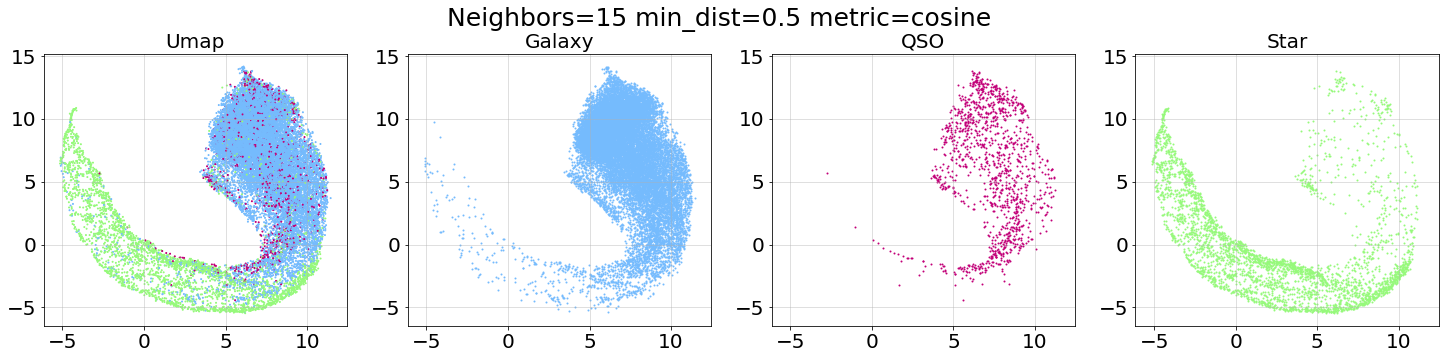

In [21]:
n = 1
fig = plt.figure(figsize=(25,5*n))
for i in range(n):
    reducer = umap.UMAP(n_neighbors=15,min_dist=0.6,metric='euclidean')
    reducer.fit(X1)
    embedding2 = reducer.transform(X1)
    xmin = min(embedding2[:,0])-1
    xmax = max(embedding2[:,0])+1
    ymin = min(embedding2[:,1])-1
    ymax = max(embedding2[:,1])+1            

    plt.subplot(n,4,4*i+1)
    plt.title("Umap",size=20)
    plt.scatter(embedding2[:,0], embedding2[:,1], c=colors, cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)

    plt.subplot(n,4,4*i+2)
    plt.title("Galaxy",size=20)
    plt.scatter(embedding2[:,0][Y1==0], embedding2[:,1][Y1==0], color="#75bbfd", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

    plt.subplot(n,4,4*i+3)
    plt.title("QSO",size=20)
    plt.scatter(embedding2[:,0][Y1==1], embedding2[:,1][Y1==1], color="#c20078", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

    plt.subplot(n,4,4*i+4)
    plt.title("Star",size=20)
    plt.scatter(embedding2[:,0][Y1==2], embedding2[:,1][Y1==2], color="#96f97b", cmap='Paired', s=1.0)
    plt.grid(alpha=0.5)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)            

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.01)
plt.savefig("../Figures/experiment2"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment2"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

In [27]:
dft = pd.DataFrame(np.array([embedding2[:,0],embedding2[:,1],Y1,TID1]).T,columns=['X','Y','CLASS','TID'])
dft.to_csv("experiment2"+str(label)+".csv")
dft.head()

X         Y  CLASS           TID
0  5.383677 -5.267043    2.0  3.518615e+16
1  9.440660 -2.714615    2.0  3.518615e+16
2  5.855785 -2.969795    2.0  3.518615e+16
3  9.707918 -2.749069    2.0  3.518615e+16
4 -0.891270 -0.498019    2.0  3.518615e+16

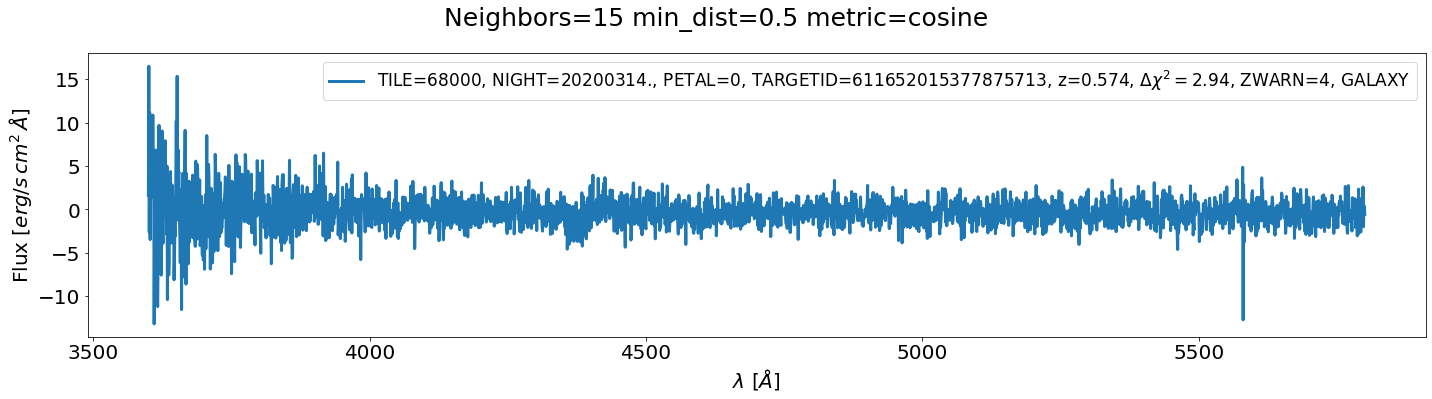

In [23]:
jj = (embedding2[:,0]>0) & (embedding2[:,0]<5) & (embedding2[:,1]>10) 
n = 1
ii = [np.random.choice(np.array(TID1)[jj]) for _ in range(n)]
kk = np.zeros(n,dtype=int)

for k,i in enumerate(ii):
    kk[k] = np.where(df['TARGETID']==i)[0][0]

fig = plt.figure(figsize=(20,5*n))
for k,i in enumerate(kk):
    plt.subplot(n,1,k+1)
    plt.plot(df['WAVELENGTH'][i],df['FLUX'][i],
             label="TILE="+str(df['TILE'][i])+", "+"NIGHT="+str(df['NIGHT'][i])
             +", "+"PETAL="+str(df['PETAL'][i])+", "+"TARGETID="+str(int(df['TARGETID'][i]))
             +", "+"z="+str(round(df['Z'][i],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][i],3))
             +", "+"ZWARN="+str(df['ZWARN'][i])+", "+str(df['SPECTYPE'][i]))
    #plt.plot(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),
    #         label="SMOOTHED spectrum",alpha=0.7,color='k')
    #plt.fill_between(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),np.min(df['FLUX'][i]),alpha=0.4,color='orange')
    plt.legend(fontsize=17)
    plt.xlabel("$\lambda$ $[\AA]$")
    plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y =1.1)
plt.tight_layout()
plt.savefig("../Figures/experiment2_i1"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment2_i1"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

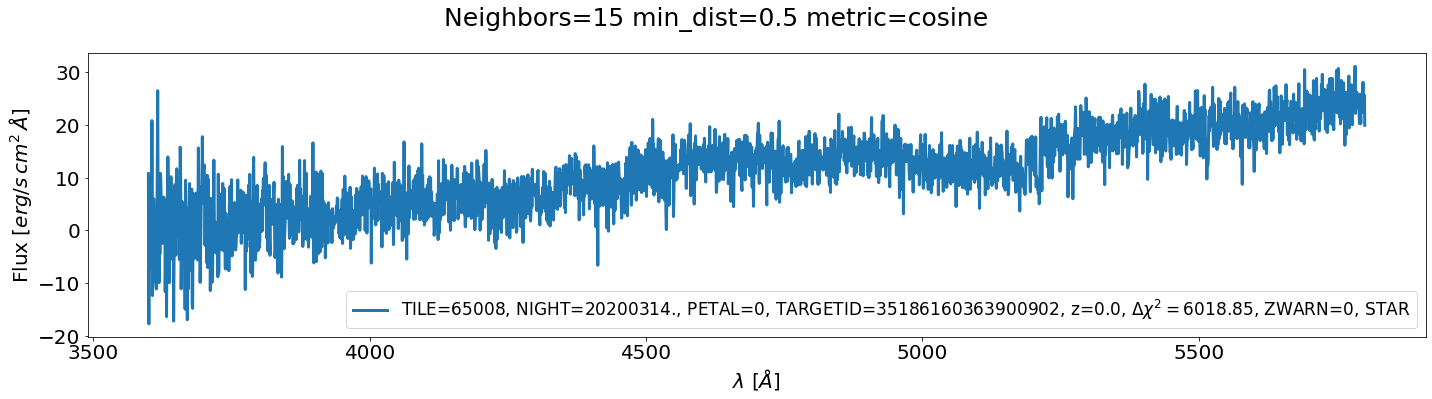

In [24]:
jj = (embedding2[:,0]>0) & (embedding2[:,0]<5) & (embedding2[:,1]<0)
n = 1
ii = [np.random.choice(np.array(TID1)[jj]) for _ in range(n)]
kk = np.zeros(n,dtype=int)

for k,i in enumerate(ii):
    kk[k] = np.where(df['TARGETID']==i)[0][0]

fig = plt.figure(figsize=(20,5*n))
for k,i in enumerate(kk):
    plt.subplot(n,1,k+1)
    plt.plot(df['WAVELENGTH'][i],df['FLUX'][i],
             label="TILE="+str(df['TILE'][i])+", "+"NIGHT="+str(df['NIGHT'][i])
             +", "+"PETAL="+str(df['PETAL'][i])+", "+"TARGETID="+str(int(df['TARGETID'][i]))
             +", "+"z="+str(round(df['Z'][i],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][i],3))
             +", "+"ZWARN="+str(df['ZWARN'][i])+", "+str(df['SPECTYPE'][i]))
    #plt.plot(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),
    #         label="SMOOTHED spectrum",alpha=0.7,color='k')
    #plt.fill_between(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),np.min(df['FLUX'][i]),alpha=0.4,color='orange')
    plt.legend(fontsize=17)
    plt.xlabel("$\lambda$ $[\AA]$")
    plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.1)
plt.tight_layout()
plt.savefig("../Figures/experiment2_i2"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment2_i2"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()

In [ ]:
jj = (embedding2[:,0]<0) & (embedding2[:,0]>-5) & (embedding2[:,1]<13) & (embedding2[:,1]>12)
n = 1
ii = [np.random.choice(np.array(TID1)[jj]) for _ in range(n)]
kk = np.zeros(n,dtype=int)

for k,i in enumerate(ii):
    kk[k] = np.where(df['TARGETID']==i)[0][0]

fig = plt.figure(figsize=(20,5*n))
for k,i in enumerate(kk):
    plt.subplot(n,1,k+1)
    plt.plot(df['WAVELENGTH'][i],df['FLUX'][i],
             label="TILE="+str(df['TILE'][i])+", "+"NIGHT="+str(df['NIGHT'][i])
             +", "+"PETAL="+str(df['PETAL'][i])+", "+"TARGETID="+str(int(df['TARGETID'][i]))
             +", "+"z="+str(round(df['Z'][i],3))+", "+"$\Delta\chi^2=$"+str(round(df['DELTACHI2'][i],3))
             +", "+"ZWARN="+str(df['ZWARN'][i])+", "+str(df['SPECTYPE'][i]))
    #plt.plot(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),
    #         label="SMOOTHED spectrum",alpha=0.7,color='k')
    #plt.fill_between(df['WAVELENGTH'][i],medfilt(df['FLUX'][i], 101),np.min(df['FLUX'][i]),alpha=0.4,color='orange')
    plt.legend(fontsize=17)
    plt.xlabel("$\lambda$ $[\AA]$")
    plt.ylabel("Flux $[erg/s\,cm^2\,\AA]$")

fig.suptitle("Neighbors="+str(15)+ " min_dist="+str(round(0.5,2))+" metric="+str('cosine'),size=25, y=1.1)
plt.tight_layout()
plt.savefig("../Figures/experiment2_i3"+str(label)+".png",renderized=True, transparent=True)
plt.savefig("../Figures/experiment2_i3"+str(label)+".pdf",renderized=True, transparent=True)
plt.show()